# Introduction

Analyzing Android App Store Data and make into Charts with Plotly

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018.

# Import Statements

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset and Data Cleaning

In [3]:
df_apps = pd.read_csv('apps.csv')
print(df_apps.shape)
df_apps.sample(5)  # Look into 5 random rows

(10841, 12)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
3298,FR: My Famous Lover,FAMILY,4.00,185,28.00,"10,000",Free,0,Teen,Entertainment,"August 6, 2015",3.0 and up
6396,[root] Pry-Fi,TOOLS,3.90,6736,0.07,"500,000",Free,0,Everyone,Tools,"February 2, 2014",4.2 and up
4898,Walking for Weight Loss - Walk Tracker,HEALTH_AND_FITNESS,4.50,644,5.50,"100,000",Free,0,Everyone,Health & Fitness,"July 25, 2018",4.1 and up
3974,El Chavo,FAMILY,4.00,751,49.00,"10,000",Paid,$0.99,Everyone,Casual,"November 4, 2014",2.3 and up
10406,Sniper 3D Gun Shooter: Free Shooting Games - FPS,GAME,4.60,7657490,36.00,"100,000,000",Free,0,Mature 17+,Action,"August 2, 2018",Varies with device


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [4]:
df_apps.drop(['Last_Updated', 'Android_Ver'], axis=1, inplace=True)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [5]:
df_apps_clean = df_apps.dropna()
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates

In [6]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()


(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [7]:
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'])
df_apps_clean.shape

(8199, 10)

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [8]:
df_apps_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [9]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [10]:
df_apps_clean.sort_values('Reviews', ascending=False).head(50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [11]:
ratings = df_apps_clean.Content_Rating.value_counts()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


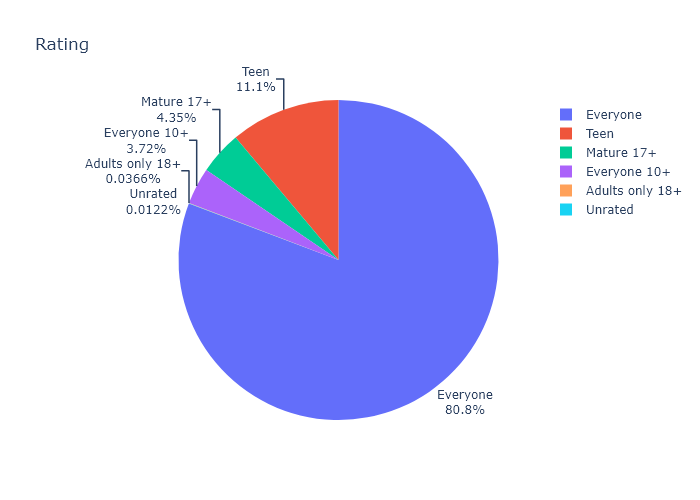

In [12]:
pie_chart = px.pie(labels=ratings.index, values=ratings.values, title="Rating", names=ratings.index)
pie_chart.update_traces(textposition="outside", textinfo="percent+label")
pie_chart.show("png")

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



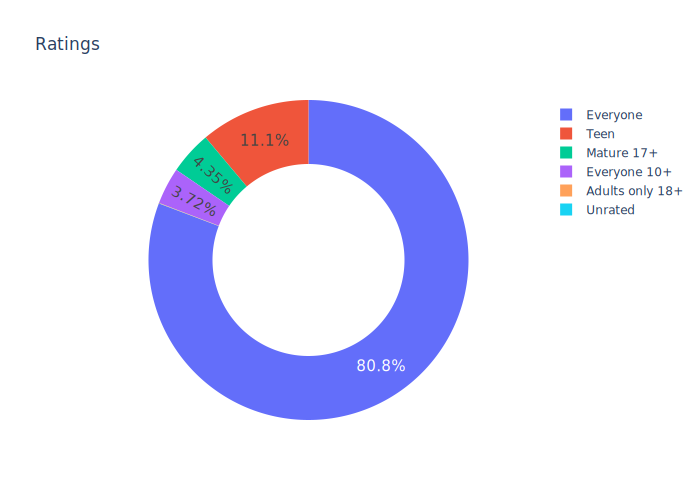

In [13]:
donut_chart = px.pie(labels=ratings.index, values=ratings.values, title="Ratings", names=ratings.index, hole=0.6)
donut_chart.update_traces(textposition="inside", textinfo="percent", textfont_size=15)
donut_chart.show("svg")

# Numeric Type Conversion: Examine the Number of Installs

In [14]:
df_apps_clean.Installs.describe()

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [15]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


In [16]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


## Finding the most Expensive Apps and Filtering out the Junk

In [17]:
df_apps_clean.Price.describe()

count     8199
unique      73
top          0
freq      7595
Name: Price, dtype: object

In [18]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$', "")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
 
df_apps_clean.sort_values('Price', ascending=False).head(20)

C:\Users\USER\AppData\Local\Temp\ipykernel_6864\710247581.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


### The most expensive apps sub $250

In [19]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [20]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [21]:
df_apps_clean.Category.nunique()

33

In [22]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

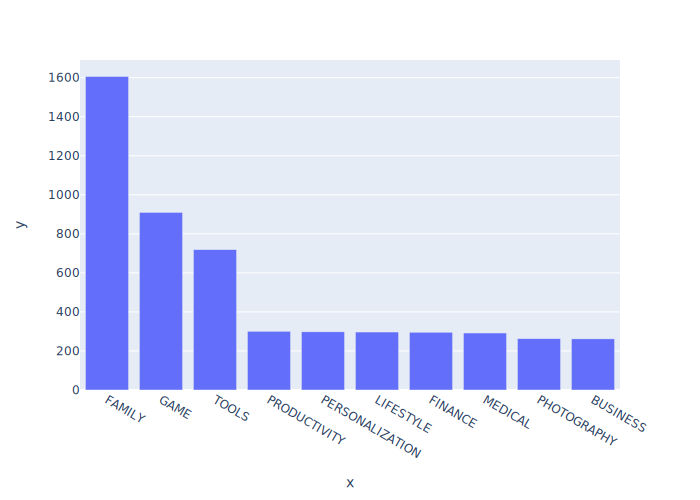

In [23]:
bar_chart = px.bar(x=top10_category.index, y=top10_category.values)
bar_chart.show("svg")

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [24]:
installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
installs.sort_values('Installs', ascending=True, inplace=True)
installs

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100
LIBRARIES_AND_DEMO,52083000
AUTO_AND_VEHICLES,53129800
HOUSE_AND_HOME,97082000
ART_AND_DESIGN,114233100


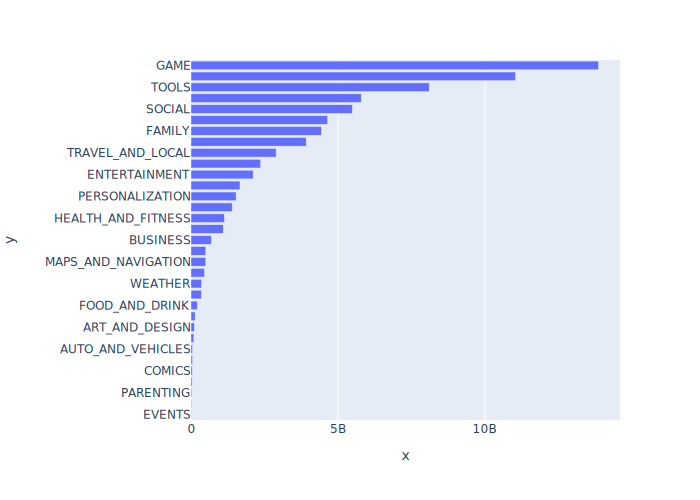

In [25]:
horizontal_bar = px.bar(x=installs.Installs, y=installs.index, orientation='h')
horizontal_bar.show("svg")

### Category Concentration - Downloads vs. Competition

In [26]:
category_num = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})

In [27]:
category_merged_df = pd.merge(category_num, installs, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {category_merged_df.shape}')
category_merged_df.sort_values('Installs', ascending=False)

The dimensions of the DataFrame are: (33, 2)


,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1606,4437554490
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


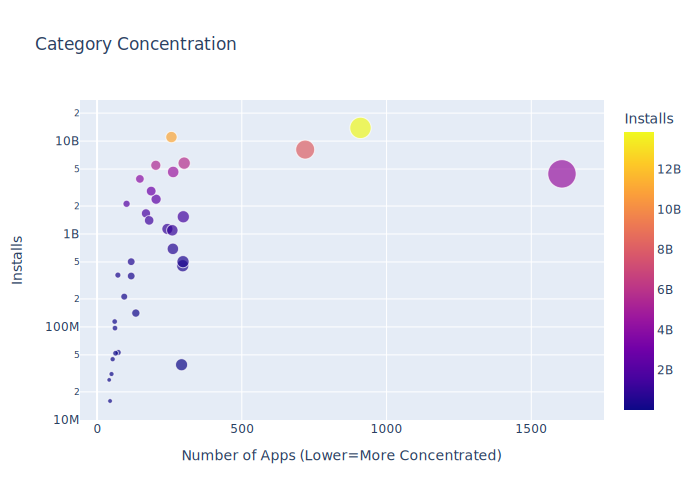

In [28]:
scatter = px.scatter(category_merged_df,
                    x='App',
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=category_merged_df.index,
                    color='Installs')
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
scatter.show("svg")

# Extracting Nested Data from a Column


In [29]:
len(df_apps_clean.Genres.unique())

114

In [30]:
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8564,)
Number of genres: 53


# Color Scales in Plotly Charts - Competition in Genres

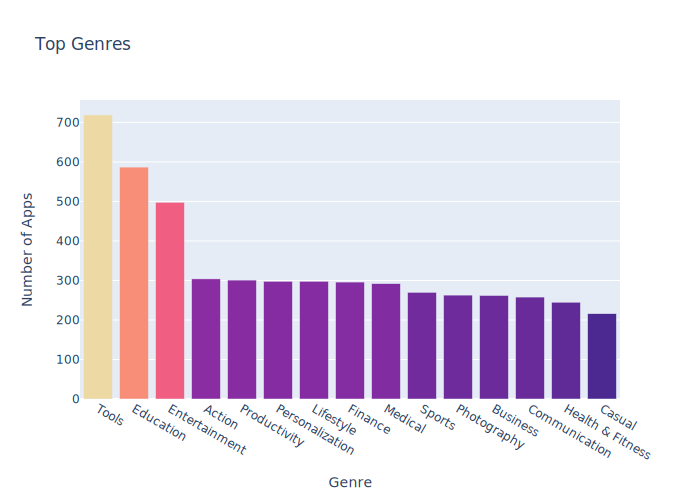

In [31]:
color_bar = px.bar(x = num_genres.index[:15], 
             y = num_genres.values[:15],
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
color_bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)

color_bar.show("svg")

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [32]:
df_apps_clean.Type.value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

In [33]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


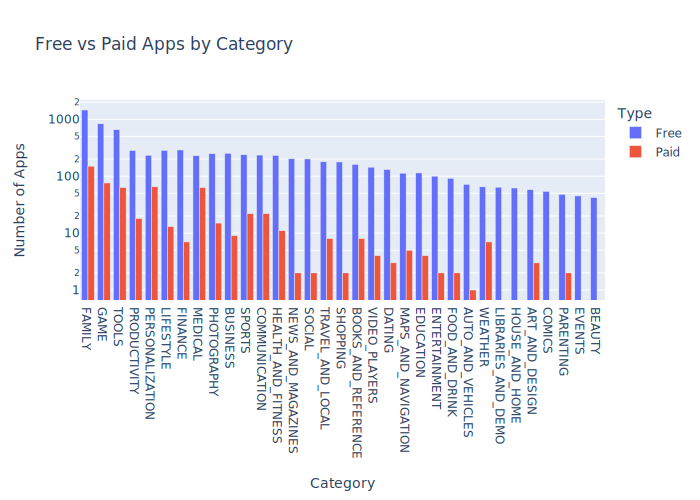

In [34]:
grouped_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
grouped_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
grouped_bar.show("svg")

# Plotly Box Plots: Lost Downloads for Paid Apps

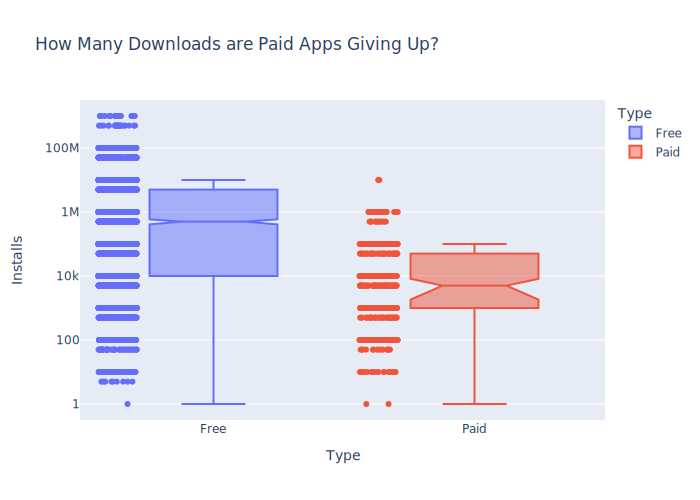

In [35]:
box = px.box(df_apps_clean,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?')
box.update_layout(yaxis=dict(type='log'))
box.show("svg")

# Plotly Box Plots: Revenue by App Category

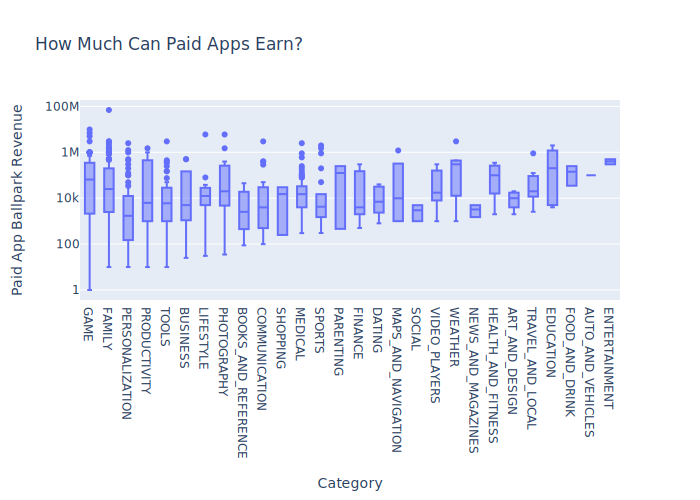

In [36]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(df_paid_apps, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
box.show("svg")

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

In [37]:
df_paid_apps.Price.median()

2.99

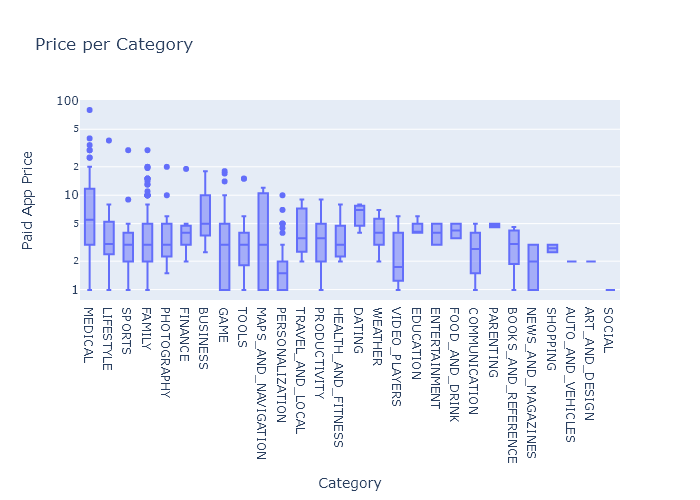

In [38]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
box.show("png")